# **Electrocardiography (ECG) Scan - Classification Heart Diseases Diagnosis**
### **Abdallah Fekry**
**Model 17**

---

#### Classes

In [27]:
classes = {0:'Normal beat',
           1:'Supraventricular premature beat',
           2:'Premature ventricular contraction',
           3:"Fusion of ventricular and normal beat",
           4:'Unclassifiable beat'}
classes[0]

'Normal beat'

#### Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from time import process_time

In [29]:
# decorator
def line():
  print()
  print("_"*80)
  print()

#### Read data

In [57]:
indexes=range(188)
df_train=pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',names=indexes)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_test = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',names=indexes)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
print(df_train.isnull().sum().sum())
df_train.isnull().sum()

0


0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [33]:
print(df_test.isnull().sum().sum())
df_test.isnull().sum()

0


0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


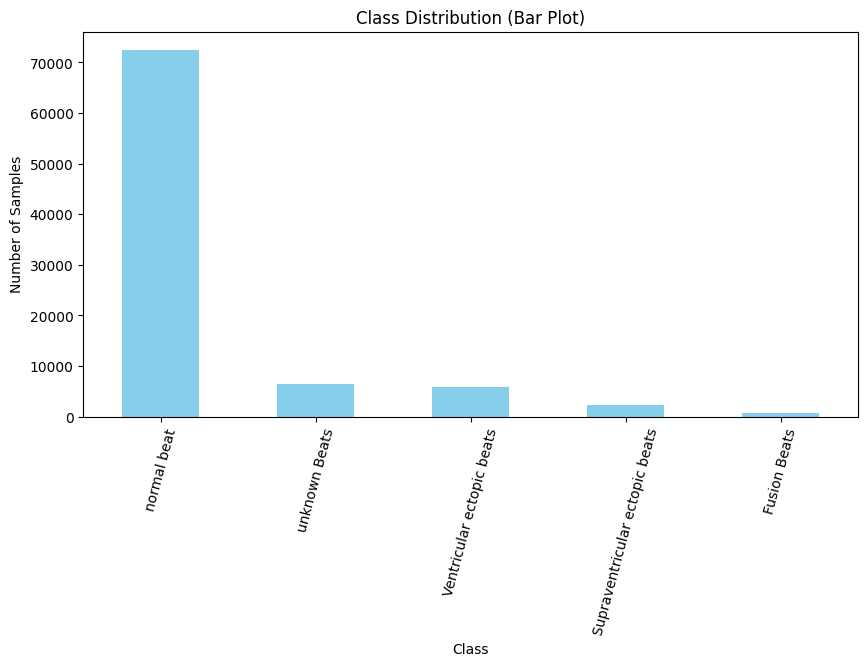

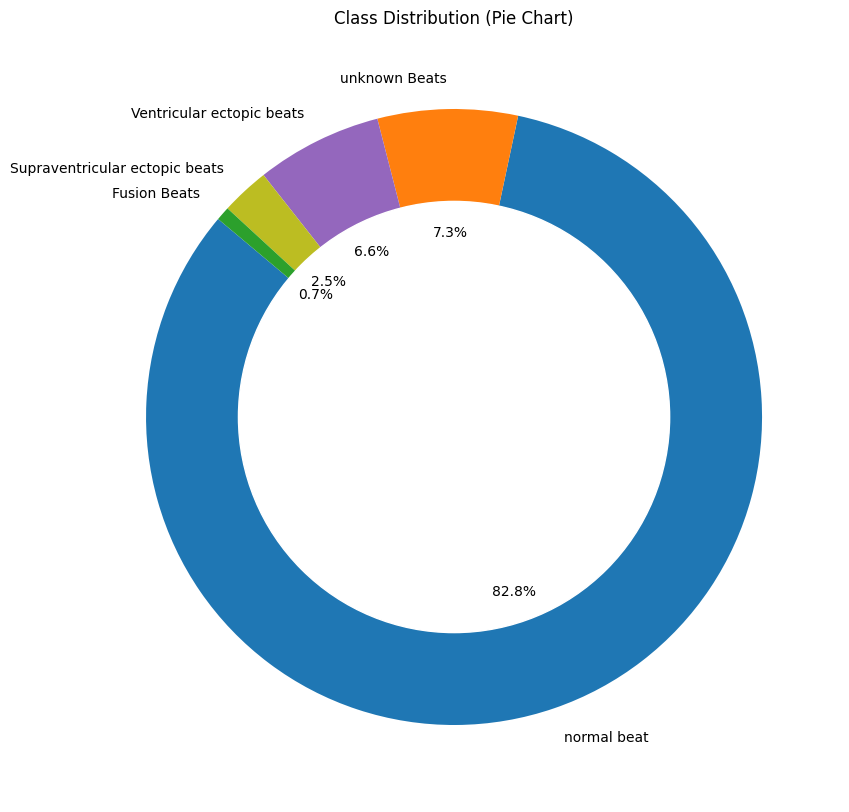

Number of samples in each class:
0.0: 72471
4.0: 6431
2.0: 5788
1.0: 2223
3.0: 641


In [50]:
# Get the class counts
per_class = df_train[187].value_counts()

# Bar plot
plt.figure(figsize=(10, 5))
per_class.plot(kind='bar', rot=75, color='skyblue')
plt.title('Class Distribution (Bar Plot)')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=range(len(per_class)), labels=['normal beat', 'unknown Beats', 'Ventricular ectopic beats', 'Supraventricular ectopic beats', 'Fusion Beats'], rotation=75)
plt.show()

# Pie chart
plt.figure(figsize=(10, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat', 'unknown Beats', 'Ventricular ectopic beats', 'Supraventricular ectopic beats', 'Fusion Beats'],
        colors=['tab:blue', 'tab:orange', 'tab:purple', 'tab:olive', 'tab:green'],
        autopct='%1.1f%%', startangle=140)
plt.gca().add_artist(my_circle)
plt.title('Class Distribution (Pie Chart)')
plt.show()

# Print the number of samples present in each class
print("Number of samples in each class:")
for label, count in per_class.items():
    print(f"{label}: {count}")

In [60]:
import pandas as pd


# Define the class label column index (187 in your case)
class_col = 187

# Separate class 0 and other classes
df_class_0 = df_train[df_train[class_col] == 0]
df_other_classes = df_train[df_train[class_col] != 0]

# Sample 7000 rows from class 0
df_class_0_sampled = df_class_0.sample(n=7000, random_state=42)  # random_state for reproducibility

# Combine the sampled class 0 with other classes
df_filtered = pd.concat([df_class_0_sampled, df_other_classes])

# Optional: Shuffle the DataFrame to mix the sampled data with other classes
df_filtered = df_filtered.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the filtered DataFrame to a new CSV file
df_filtered.to_csv('filtered_data.csv', index=False, header=None)  # Adjust the path and header as needed


In [61]:
df_train = df_filtered

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.7 MB


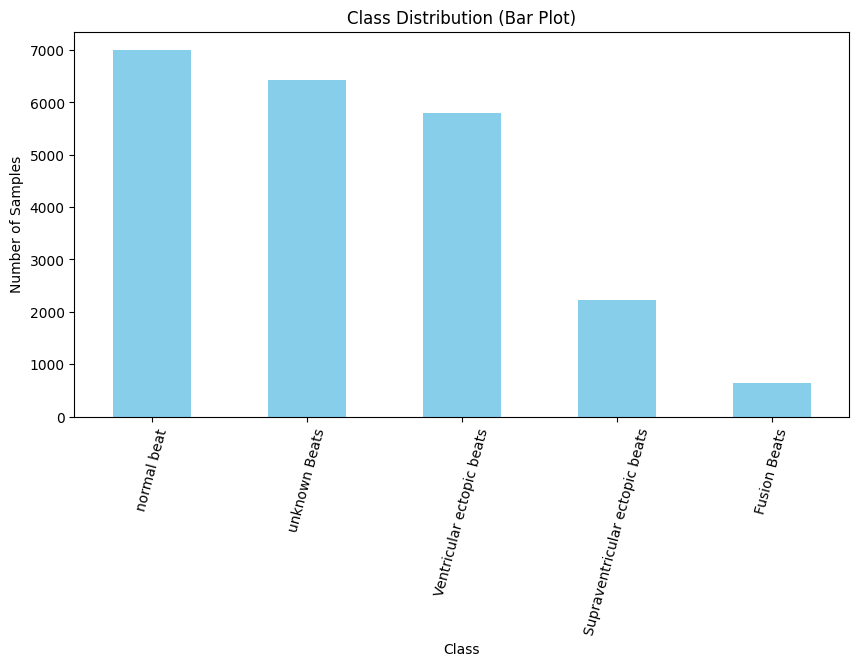

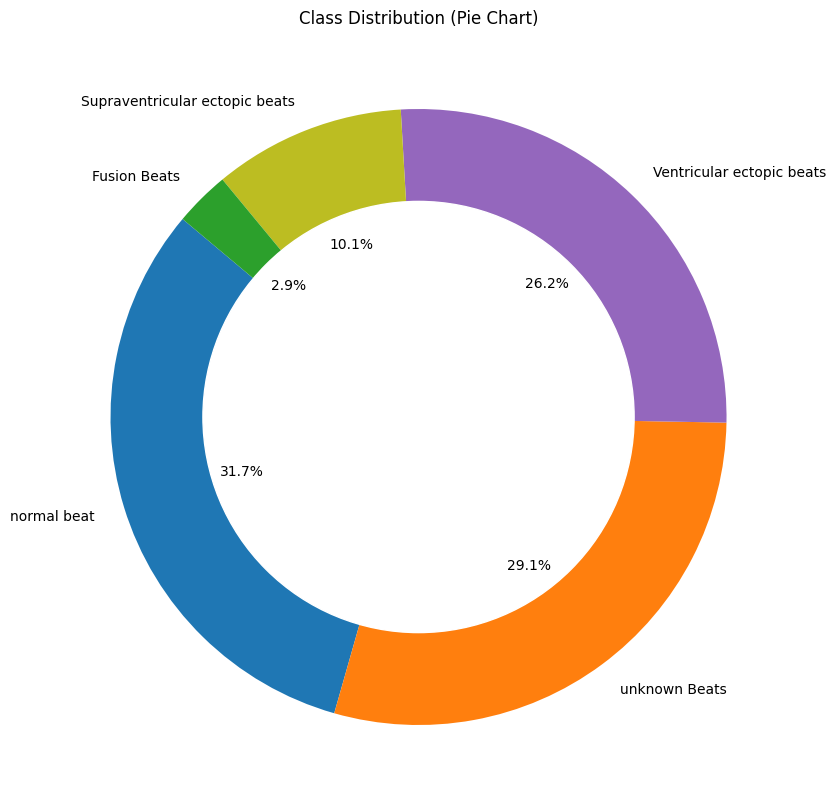

Number of samples in each class:
0.0: 7000
4.0: 6431
2.0: 5788
1.0: 2223
3.0: 641


In [63]:
# Get the class counts
per_class = df_train[187].value_counts()

# Bar plot
plt.figure(figsize=(10, 5))
per_class.plot(kind='bar', rot=75, color='skyblue')
plt.title('Class Distribution (Bar Plot)')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=range(len(per_class)), labels=['normal beat', 'unknown Beats', 'Ventricular ectopic beats', 'Supraventricular ectopic beats', 'Fusion Beats'], rotation=75)
plt.show()

# Pie chart
plt.figure(figsize=(10, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(per_class, labels=['normal beat', 'unknown Beats', 'Ventricular ectopic beats', 'Supraventricular ectopic beats', 'Fusion Beats'],
        colors=['tab:blue', 'tab:orange', 'tab:purple', 'tab:olive', 'tab:green'],
        autopct='%1.1f%%', startangle=140)
plt.gca().add_artist(my_circle)
plt.title('Class Distribution (Pie Chart)')
plt.show()

# Print the number of samples present in each class
print("Number of samples in each class:")
for label, count in per_class.items():
    print(f"{label}: {count}")

In [64]:
df_train.iloc[:,-1].unique()

array([4., 1., 0., 2., 3.])

In [65]:
df_test.iloc[:,-1].unique()

array([0., 1., 2., 3., 4.])

In [66]:
# df_train.head()
df_train=df_train.fillna(0)
df_test=df_test.fillna(0)

## Splitting data

In [67]:
# splitting dataas input & output
x_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]
x_test=df_test.iloc[:,0:-1]
y_test=df_test.iloc[:,-1]
print("x train shape:",x_train.shape,
      "\ny train shape:",y_train.shape,
      "\nx test shape:",x_test.shape,
      "\ny test shape:",y_test.shape)

x train shape: (22083, 187) 
y train shape: (22083,) 
x test shape: (21892, 187) 
y test shape: (21892,)


## Plotting Random Sample Data

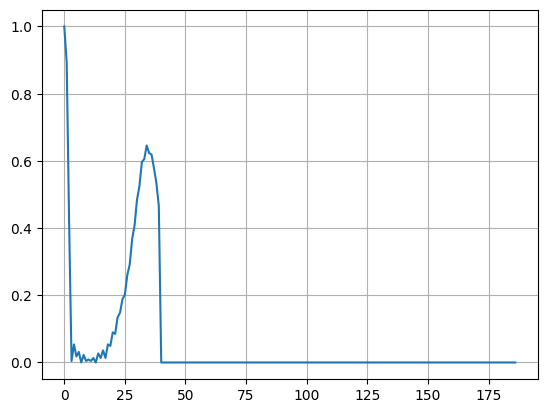

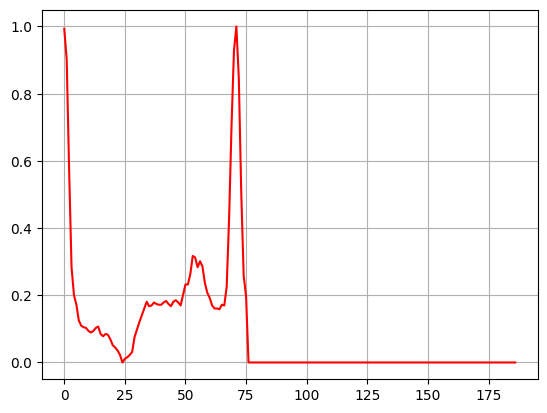

In [68]:
import random
n = random.randint(0,(len(x_train)))
plt.grid()
plt.plot(x_train.iloc[n,:])
plt.show()
n = random.randint(0,(len(x_train)))
plt.grid()
plt.plot(x_train.iloc[n,:],c='r')
plt.show()

---
<h1><center><b>Modeling</b></center></h1>

---

# 1. Logistic Regression

In [53]:
# 1 Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t1 = end-st
yp = model.predict(x_test)
score1 = accuracy_score(y_test,yp)
loss1 = mean_squared_error(y_test,yp)
print("By using Logistic Regression\n\n",
      "Accuracy: ",score1,
      "\nloss function: ",loss1,
      "\nfitting time: ",t1,'s'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')


By using Logistic Regression

Accuracy: 0.91174858395761
loss function: 0.44596199524940616
fitting time: 21.834803011999952s

Confusion Matrix
[[17838    25   200    15    40]
 [  327   197    32     0     0]
 [  905    11   478    26    28]
 [  107     0     8    47     0]
 [  186     0    22     0  1400]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: title={'center': 'Logistic Regression Heatmap'}, xlabel='Predicted', ylabel='Actual'>

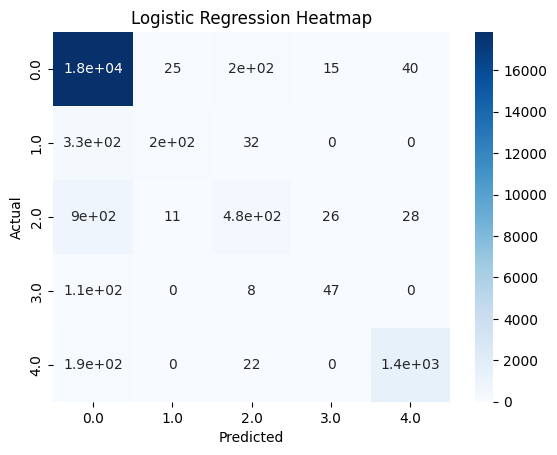

In [57]:
fig = plt.figure()
plt.title("Logistic Regression Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap="Blues")

---

# 2. Support Vector Machine SVM

In [58]:
# 2 Support Vector Machine SVM
from sklearn import svm
model = svm.SVC()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t2 = end-st
yp = model.predict(x_test)
score2 = accuracy_score(y_test,yp)
loss2  = mean_squared_error(y_test,yp)
print("By using Support Vector Machine SVM\n\n",
      "Accuracy: ",score2,
      "\nloss function: ",loss2,
      "\nfitting time: ",t2,'s'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Support Vector Machine SVM

Accuracy: 0.9680248492600037
loss function: 0.18052256532066507
fitting time: 169.77272695799996s

Confusion Matrix
[[18086    10    17     1     4]
 [  237   314     5     0     0]
 [  170     2  1249    25     2]
 [   71     0    13    78     0]
 [  135     0     8     0  1465]]


<Axes: title={'center': 'SVM Heatmap'}, xlabel='Predicted', ylabel='Actual'>

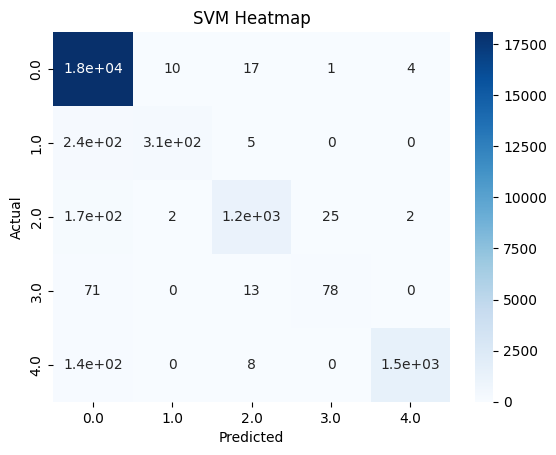

In [59]:
fig = plt.figure()
plt.title("SVM Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap='Blues')

---

# 3. Decision Tree

In [60]:
# 3 Decision Tree
from sklearn import tree
model = tree.DecisionTreeClassifier()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t3 = end-st
yp = model.predict(x_test)
score3 = accuracy_score(y_test,yp)
loss3 = mean_squared_error(y_test,yp)
print("By using Decision Tree\n\n",
      "Accuracy: ",score3,
      "\nloss function: ",loss3,
      "\nfitting time: ",t3,'s'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Decision Tree

Accuracy: 0.9531792435592911
loss function: 0.22505938242280285
fitting time: 42.29736519200003s

Confusion Matrix
[[17656   193   151    47    71]
 [  181   357    10     4     4]
 [  145    14  1245    31    13]
 [   43     0    23    95     1]
 [   71     3    19     1  1514]]


### Plotting Decision Tree

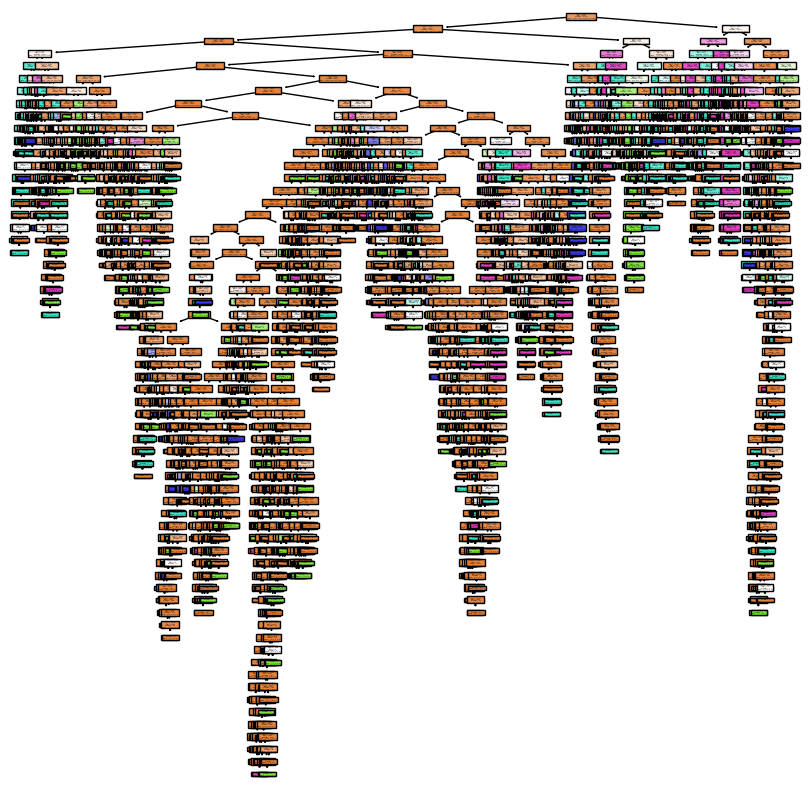

In [61]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)
plt.show()

<Axes: title={'center': 'Decision Tree Heatmap'}, xlabel='Predicted', ylabel='Actual'>

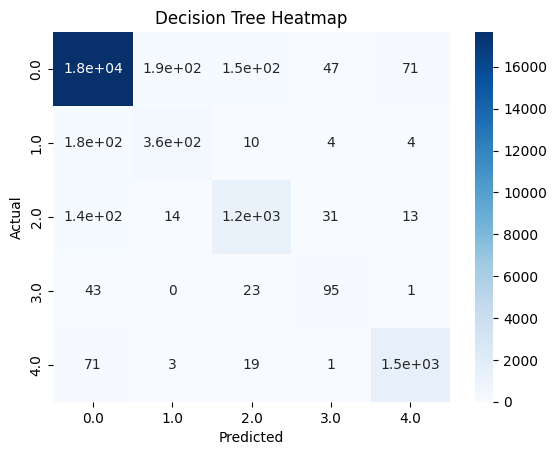

In [62]:
fig = plt.figure()
plt.title("Decision Tree Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap='Blues')

---

# 4. Random Forest
(Best accuracy)

In [69]:
# 4 Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
st = process_time()
model.fit(x_train , y_train)
end = process_time()
t4 = end-st
yp = model.predict(x_test)
score4 = accuracy_score(y_test,yp)


In [71]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
loss4 = mean_squared_error(y_test,yp)

print("By using Random Forest\n\n",
      "Accuracy: ",score4,
      "\nloss function: ",loss4,
      "\nfitting time: ",t4,'s'
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp), sep='')

By using Random Forest

Accuracy: 0.9649186917595469
loss function: 0.1586424264571533
fitting time: 20.454951621999996s

Confusion Matrix
[[17633   181   201    41    62]
 [  130   419     6     0     1]
 [   42     3  1383    14     6]
 [   23     1    16   122     0]
 [   31     2     8     0  1567]]


<Axes: title={'center': 'Random Forest Heatmap'}, xlabel='Predicted', ylabel='Actual'>

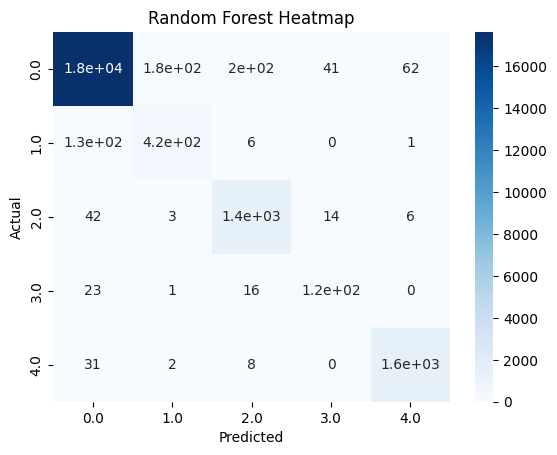

In [72]:
import seaborn as sns
fig = plt.figure()
plt.title("Random Forest Heatmap")
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m,annot=True, cmap='Blues')

### Classification Report

In [73]:
cr = classification_report(y_test, yp)
print(cr)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     18118
         1.0       0.69      0.75      0.72       556
         2.0       0.86      0.96      0.90      1448
         3.0       0.69      0.75      0.72       162
         4.0       0.96      0.97      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.84      0.88      0.86     21892
weighted avg       0.97      0.96      0.97     21892



---
---

# Best Practice Table - Comparison

In [63]:
info={
    "Algorithm Name":["Logistic Regression","Support Vector Machine SVM","Decision Tree","Random Forest"],
    "Accuracy":[round(score1*100,3),round(score2*100,3),round(score3*100,3),round(score4*100,3)],
    "Loss Function":[loss1,loss2,loss3,loss4],
    "Fitting Time in second":[str(round(t1,3))+'s',str(round(t2,3))+'s',str(round(t3,3))+'s',str(round(t4,3))+'s']
}

info_df=pd.DataFrame(info)
info_df

,Algorithm Name,Accuracy,Loss Function,Fitting Time in second
0,Logistic Regression,91.175,0.445962,21.835s
1,Support Vector Machine SVM,96.802,0.180523,169.773s
2,Decision Tree,95.318,0.225059,42.297s
3,Random Forest,97.428,0.128266,147.78s


---

# Random testing sampling every run

-> at index number 8655

- Actual value: {yt}
- Predicted value: Class {p1}, {p2}



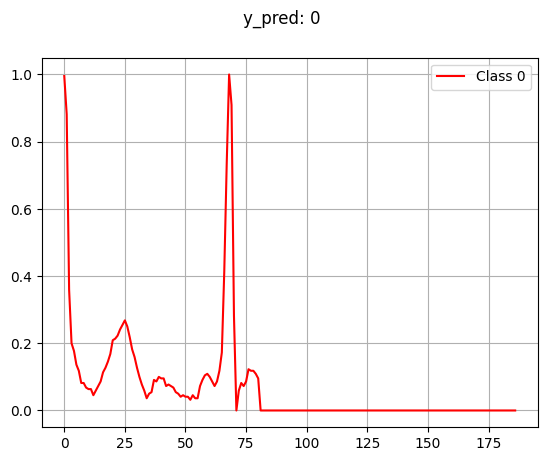

In [74]:
import random
n = random.randint(0,(len(x_test)))
x1 = x_test.iloc[n,:].values
yt = int(y_test.iloc[n])
p1 = int(model.predict(x1.reshape(1,-1))[0])
p2 = classes[p1]
print(f"-> at index number {n}\n\n",
      "- Actual value: {yt}\n",
      "- Predicted value: Class {p1}, {p2}", sep='', end='\n\n')
plt.grid()
plt.plot(x1, label=f"Class {yt}", c='red')
plt.suptitle(f"y_pred: {p1}")
plt.legend(loc='upper right')
plt.show()

---

Saving the trained model

In [75]:
import pickle
with open('/kaggle/working/ECG.pkl', 'wb') as f:
    pickle.dump(model, f)

Downloading

In [76]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'ECG.pkl')

/kaggle/working


/kaggle/working/ECG.pkl

In [77]:
import sklearn
sklearn.__version__

'1.2.2'

In [78]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Ensure this is imported


# Load the saved model
with open('/kaggle/input/ecg/other/default/1/ECG.pkl', 'rb') as f:
    model = pickle.load(f)


In [79]:
# Predicting for the specific row number 78000
row_number = 21000
single_row = x_test.iloc[row_number, :].values.reshape(1, -1)  # Reshape it for prediction
actual_class = int(y_test.iloc[row_number])

In [80]:
print(actual_class)

4


In [81]:
predicted_class = loaded_model.predict(single_row)[0]
predicted_class_label = classes[predicted_class]

In [82]:
# Display the result
print(f"-> At index number {n}:\n")
print(f"Actual class: {actual_class}")
print(f"Predicted class: Class {predicted_class}, {predicted_class_label}")

-> At index number 8655:

Actual class: 4
Predicted class: Class 4.0, Unclassifiable beat


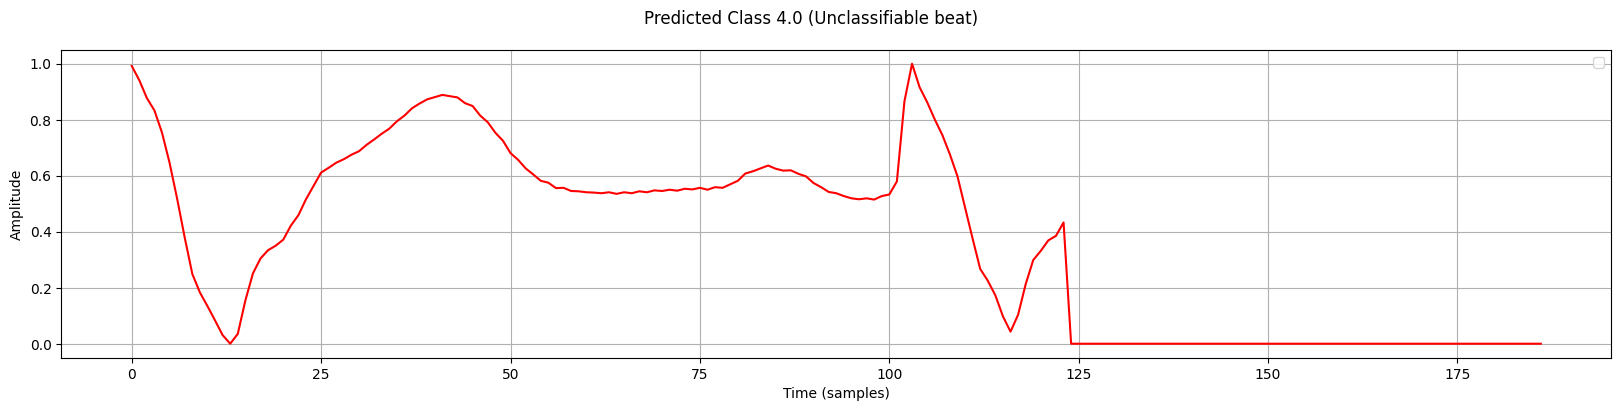

In [83]:
# Stretch the ECG plot horizontally
plt.figure(figsize=(20, 4))  # Increase width (20) and reduce height (4) for horizontal stretching
plt.grid()
plt.plot(single_row[0], c='red')
plt.suptitle(f"Predicted Class {predicted_class} ({predicted_class_label})")
plt.legend(loc='upper right')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

Prediction for row 20000:
Predicted class: 2 (Premature ventricular contraction)


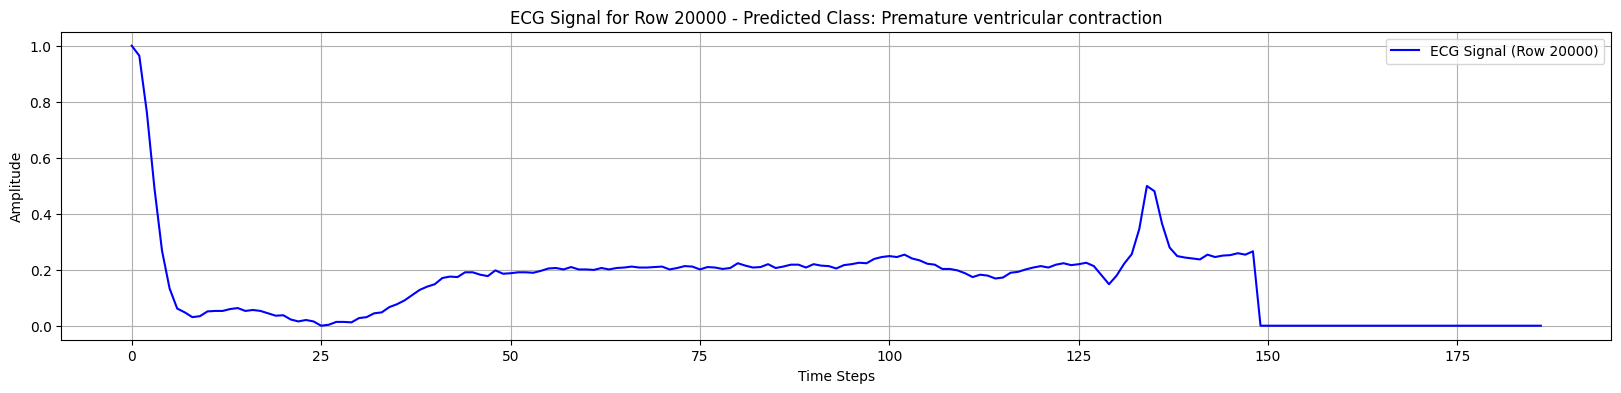

In [84]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# The class labels
classes = {0: 'Normal beat',
           1: 'Supraventricular premature beat',
           2: 'Premature ventricular contraction',
           3: "Fusion of ventricular and normal beat",
           4: 'Unclassifiable beat'}

# Load the RandomForest model from the pickle file
with open('/kaggle/input/ecg/other/default/1/ECG.pkl', 'rb') as f:
    model = pickle.load(f)

# Function to load CSV, predict for a specific row, and visualize
def predict_for_row(csv_file_path, row_number):
    # Load the CSV file
    data = pd.read_csv(csv_file_path, header=None)
    
    # Separate input (features) and output (labels)
    x_data = data.iloc[:, :-1]
    y_data = data.iloc[:, -1]
    
    # Get the specific row for prediction
    single_row = x_data.iloc[row_number, :].values.reshape(1, -1)  # Reshape for prediction
    actual_class = int(y_data.iloc[row_number])

    # Predict the class
    predicted_class = int(model.predict(single_row)[0])

    # Get class labels from the dictionary
    actual_class_label = classes.get(actual_class, "Unknown")
    predicted_class_label = classes.get(predicted_class, "Unknown")

    # Print the actual and predicted values
    print(f"Prediction for row {row_number}:")
    print(f"Predicted class: {predicted_class} ({predicted_class_label})")

    # Visualize the row (ECG signals)
    plt.figure(figsize=(20, 4))  # Stretch horizontally
    plt.plot(single_row.flatten(), color='blue', label=f"ECG Signal (Row {row_number})")
    plt.title(f"ECG Signal for Row {row_number} - Predicted Class: {predicted_class_label}")
    plt.xlabel('Time Steps')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

# Example usage
csv_file_path = '/kaggle/input/heartbeat/mitbih_test.csv'  # Provide the path to the CSV file
row_number = 20000  # Specify the row number for prediction
predict_for_row(csv_file_path, row_number)


In [85]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lime, mapclassify, mlxtend, nilearn, pyLDAvis, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, yellowbrick
Note: you may need to restart the kernel to use updated packages.


In [86]:
csv_file_path = '/kaggle/input/heartbeat/mitbih_test.csv' 

In [87]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv')

# Get the number of rows
num_rows = df.shape[0]

# Get the shape of the DataFrame
shape = df.shape

print(f"Number of rows: {num_rows}")
print(f"Shape of the DataFrame: {shape}")


Number of rows: 21891
Shape of the DataFrame: (21891, 188)


In [88]:
# Count the number of occurrences of each label
label_counts = df.iloc[:, -1].value_counts()

# Print the distribution
print("Distribution of labels:")
print(label_counts)


Distribution of labels:
0.000000000000000000e+00.65
0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


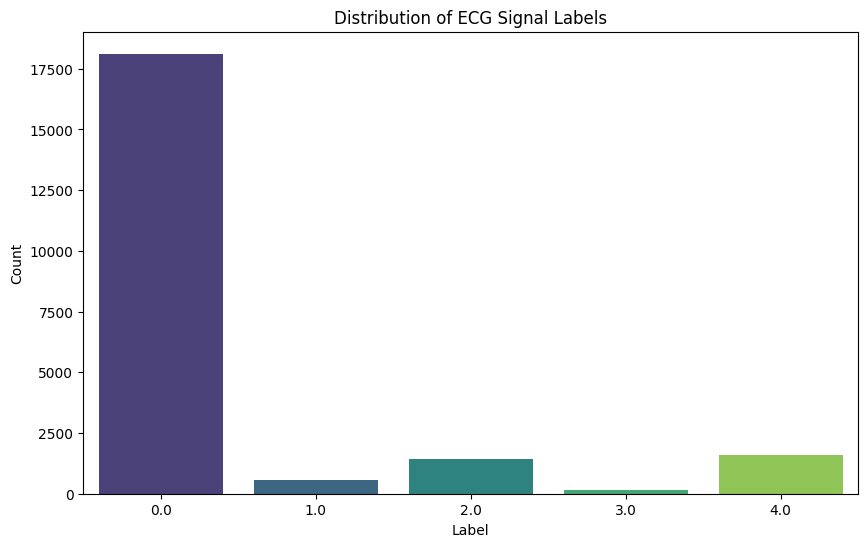

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences of each label
label_counts = df.iloc[:, -1].value_counts()

# Create a bar plot of the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of ECG Signal Labels')
plt.show()


In [90]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv')

# Get the last column which represents the labels
labels = df.iloc[:, -1]

# Initialize an empty list to store the dataframes for each label
dfs = []

# Loop through each unique label
for label in labels.unique():
    # Filter rows for the current label
    df_label = df[df.iloc[:, -1] == label]
    # Take 20 rows from the filtered DataFrame
    df_label_sample = df_label.head(50)
    # Append the sampled DataFrame to the list
    dfs.append(df_label_sample)

# Concatenate all the sampled DataFrames into one
df_sampled = pd.concat(dfs)

# Save the new DataFrame to a CSV file
df_sampled.to_csv('/kaggle/working/mitbih_sampled.csv', index=False)

print("New dataset with 20 rows per label class created and saved.")


New dataset with 20 rows per label class created and saved.


In [91]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/working/mitbih_sampled.csv')

# Get the number of rows
num_rows = df.shape[0]

# Get the shape of the DataFrame
shape = df.shape

print(f"Number of rows: {num_rows}")
print(f"Shape of the DataFrame: {shape}")


Number of rows: 250
Shape of the DataFrame: (250, 188)


In [25]:
# Count the number of occurrences of each label
label_counts = df.iloc[:, -1].value_counts()

# Print the distribution
print("Distribution of labels:")
print(label_counts)


Distribution of labels:
0.000000000000000000e+00.65
0.0    50
1.0    50
2.0    50
3.0    50
4.0    50
Name: count, dtype: int64


In [26]:
import os
import pandas as pd
from zipfile import ZipFile

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/working/mitbih_sampled.csv')

# Create a directory to hold the class subfolders
output_dir = '/kaggle/working/mitbih_classified'
os.makedirs(output_dir, exist_ok=True)

# Loop through each unique label
for label in df.iloc[:, -1].unique():
    # Create a subfolder for the current label
    label_dir = os.path.join(output_dir, str(int(label)))
    os.makedirs(label_dir, exist_ok=True)

    # Filter rows for the current label
    df_label = df[df.iloc[:, -1] == label]

    # Iterate through each row in the filtered DataFrame
    for i, row in df_label.iterrows():
        # Create a CSV file name based on the row index
        csv_file_name = f'{i}.csv'
        csv_file_path = os.path.join(label_dir, csv_file_name)
        
        # Save the row as a CSV file
        row.to_frame().T.to_csv(csv_file_path, index=False, header=False)

# Zip the folder
zip_file_path = '/kaggle/working/mitbih_classified.zip'
with ZipFile(zip_file_path, 'w') as zipf:
    # Walk through the directory and add files to the zip
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, output_dir))

print("Zip folder created at:", zip_file_path)


Zip folder created at: /kaggle/working/mitbih_classified.zip
